# Projet Machine Learning : Prédiction du Succès des Campagnes de Télémarketing Bancaire

**Auteur(s):** [Vos noms]  
**Date:** Janvier 2026  
**Dataset:** Bank Marketing Dataset - UCI Machine Learning Repository

---

## Table des Matières
1. [Description du Problème et Objectifs](#1)
2. [Description des Données](#2)
3. [Exploration et Analyse des Données](#3)
4. [Preprocessing et Feature Engineering](#4)
5. [Modélisation](#5)
6. [Évaluation et Comparaison des Modèles](#6)
7. [Validation Finale](#7)
8. [Conclusions et Perspectives](#8)

<a id='1'></a>
## 1. Description du Problème et Objectifs

### 1.1 Contexte
Une institution bancaire portugaise a mené des campagnes de marketing direct basées sur des appels téléphoniques pour promouvoir des dépôts à terme. Ces campagnes ont nécessité de multiples contacts avec les mêmes clients pour déterminer s'ils souscrivaient ou non au produit bancaire proposé.

### 1.2 Problème à Résoudre
**Problématique :** Prédire si un client va souscrire à un dépôt à terme bancaire (variable `y`) en fonction de ses caractéristiques personnelles, du contexte de la campagne et des indicateurs socio-économiques.

### 1.3 Type de Problème
**Classification Binaire**
- Il s'agit d'un problème de **classification** car la variable cible est catégorielle binaire (yes/no)
- **Non une régression** car nous ne prédisons pas une valeur numérique continue
- **Objectif :** Classifier chaque client en deux catégories : 
  - Classe positive (1) : le client souscrit au dépôt (`y = yes`)
  - Classe négative (0) : le client ne souscrit pas (`y = no`)

### 1.4 Variables et Features

**Variable Cible (Target) :**
- `y` : Le client a-t-il souscrit à un dépôt à terme ? (binaire: "yes"/"no")

**Features (20 variables d'entrée) :**

**A. Données du client bancaire (7 features)**
- `age` : Âge (numérique)
- `job` : Type d'emploi (catégorielle)
- `marital` : Statut matrimonial (catégorielle)
- `education` : Niveau d'éducation (catégorielle)
- `default` : Crédit en défaut ? (catégorielle)
- `housing` : Prêt immobilier ? (catégorielle)
- `loan` : Prêt personnel ? (catégorielle)

**B. Données du dernier contact de la campagne (4 features)**
- `contact` : Type de communication (catégorielle)
- `month` : Mois du dernier contact (catégorielle)
- `day_of_week` : Jour de la semaine (catégorielle)
- `duration` : Durée du dernier contact en secondes (numérique) - **Note importante :** cette variable ne sera pas utilisée pour la prédiction car elle n'est connue qu'après l'appel

**C. Autres attributs de la campagne (4 features)**
- `campaign` : Nombre de contacts durant cette campagne (numérique)
- `pdays` : Jours depuis le dernier contact d'une campagne précédente (numérique, 999 = jamais contacté)
- `previous` : Nombre de contacts avant cette campagne (numérique)
- `poutcome` : Résultat de la campagne précédente (catégorielle)

**D. Indicateurs socio-économiques (5 features)**
- `emp.var.rate` : Taux de variation de l'emploi (numérique)
- `cons.price.idx` : Indice des prix à la consommation (numérique)
- `cons.conf.idx` : Indice de confiance des consommateurs (numérique)
- `euribor3m` : Taux Euribor à 3 mois (numérique)
- `nr.employed` : Nombre d'employés (numérique)

### 1.5 Algorithmes à Utiliser

Nous allons implémenter et comparer **5 algorithmes différents** vus en cours :

1. **Régression Logistique** - Modèle de classification linéaire de référence
2. **Decision Tree (Arbre de Décision)** - Algorithme basé sur des règles de décision
3. **Naive Bayes** - Classification probabiliste basée sur le théorème de Bayes
4. **Perceptron** - Algorithme de classification linéaire
5. **K-Nearest Neighbors (KNN)** - Classification basée sur la similarité avec les k voisins les plus proches

### 1.6 Métriques d'Évaluation

Étant donné qu'il s'agit d'un problème de classification binaire potentiellement déséquilibré, nous utiliserons les métriques vues en cours :

**Métriques principales :**
- **Accuracy** : Taux de bonnes prédictions global = $\frac{TP + TN}{TP + TN + FP + FN}$
- **Precision** : Proportion de vrais positifs parmi les prédictions positives = $\frac{TP}{TP + FP}$
- **Recall (Sensibilité)** : Proportion de vrais positifs détectés parmi tous les positifs réels = $\frac{TP}{TP + FN}$
- **F1-Score** : Moyenne harmonique de Precision et Recall = $2 \times \frac{Precision \times Recall}{Precision + Recall}$
- **Matrice de Confusion** : Visualisation des vrais/faux positifs/négatifs

**Métriques complémentaires :**
- **ROC-AUC Score** : Aire sous la courbe ROC, mesure la capacité de discrimination
- **Courbe ROC** : Pour visualiser le compromis sensibilité/spécificité

### 1.7 Stratégie de Validation (Model Selection)

- **Train-Test Split** : 80% entraînement, 20% test
- **Validation Croisée (K-Fold)** : 5-fold cross-validation pour évaluer la robustesse
- **Stratification** : Maintenir la proportion des classes dans les ensembles

<a id='2'></a>
## 2. Import des Bibliothèques et Chargement des Données

In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix, classification_report, 
                             roc_curve, auc)
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Bibliothèques importées avec succès")

✓ Bibliothèques importées avec succès


In [2]:
# Chargement des données
# Nous utilisons le dataset complet (bank-additional-full.csv) pour une meilleure analyse
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

print(f"✓ Données chargées avec succès")
print(f"Dimensions du dataset : {df.shape[0]} lignes et {df.shape[1]} colonnes")

✓ Données chargées avec succès
Dimensions du dataset : 41188 lignes et 21 colonnes


<a id='3'></a>
## 3. Exploration et Analyse des Données (EDA)

In [3]:
# Aperçu des premières lignes
print("=" * 80)
print("APERÇU DES DONNÉES")
print("=" * 80)
df.head(10)

APERÇU DES DONNÉES


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Informations générales sur le dataset
print("=" * 80)
print("INFORMATIONS SUR LE DATASET")
print("=" * 80)
print(df.info())
print("\n" + "=" * 80)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 80)
df.describe()

INFORMATIONS SUR LE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  con

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Vérification des valeurs manquantes
print("=" * 80)
print("VALEURS MANQUANTES")
print("=" * 80)
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✓ Aucune valeur manquante détectée (NaN)")
    print("\nNote : Les valeurs 'unknown' dans les variables catégorielles seront traitées lors du preprocessing")
else:
    print(missing_values[missing_values > 0])

VALEURS MANQUANTES
✓ Aucune valeur manquante détectée (NaN)

Note : Les valeurs 'unknown' dans les variables catégorielles seront traitées lors du preprocessing


DISTRIBUTION DE LA VARIABLE CIBLE (y)

Nombre de clients par classe :
y
no     36548
yes     4640
Name: count, dtype: int64

Proportion (%) :
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


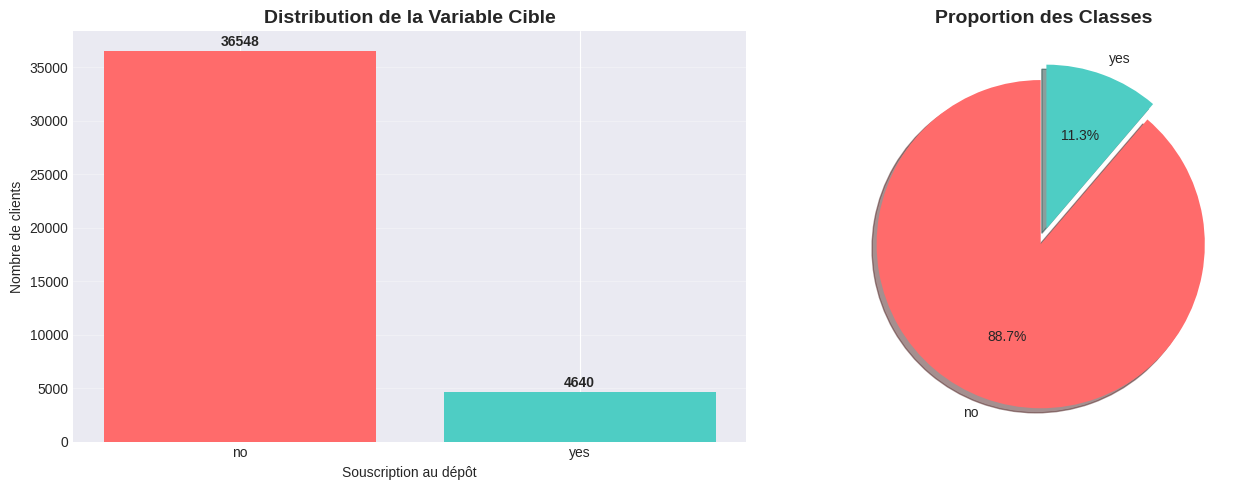


⚠️ DÉSÉQUILIBRE DES CLASSES : Ratio (no/yes) = 7.88
   → Pour chaque client qui souscrit, il y a 7.9 clients qui ne souscrivent pas
   → Ce déséquilibre devra être pris en compte lors de la modélisation


In [6]:
# Analyse de la variable cible
print("=" * 80)
print("DISTRIBUTION DE LA VARIABLE CIBLE (y)")
print("=" * 80)
target_counts = df['y'].value_counts()
target_props = df['y'].value_counts(normalize=True) * 100

print(f"\nNombre de clients par classe :")
print(target_counts)
print(f"\nProportion (%) :")
print(target_props)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique en barres
axes[0].bar(target_counts.index, target_counts.values, color=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Distribution de la Variable Cible', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Souscription au dépôt')
axes[0].set_ylabel('Nombre de clients')
axes[0].grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 500, str(v), ha='center', fontweight='bold')

# Graphique circulaire
colors = ['#ff6b6b', '#4ecdc4']
explode = (0.05, 0.05)
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
            colors=colors, explode=explode, shadow=True, startangle=90)
axes[1].set_title('Proportion des Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Analyse du déséquilibre
ratio = target_counts['no'] / target_counts['yes']
print(f"\n⚠️ DÉSÉQUILIBRE DES CLASSES : Ratio (no/yes) = {ratio:.2f}")
print(f"   → Pour chaque client qui souscrit, il y a {ratio:.1f} clients qui ne souscrivent pas")
print(f"   → Ce déséquilibre devra être pris en compte lors de la modélisation")

In [7]:
# Analyse des variables catégorielles
print("=" * 80)
print("ANALYSE DES VARIABLES CATÉGORIELLES")
print("=" * 80)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Retirer la variable cible

print(f"\nNombre de variables catégorielles : {len(categorical_cols)}")
print(f"Variables : {categorical_cols}")

# Compter les catégories uniques pour chaque variable
print("\nNombre de catégories uniques par variable :")
for col in categorical_cols:
    n_unique = df[col].nunique()
    print(f"  - {col}: {n_unique} catégories")
    
# Vérifier les valeurs "unknown"
print("\n" + "=" * 80)
print("VALEURS 'UNKNOWN' DANS LES VARIABLES CATÉGORIELLES")
print("=" * 80)
for col in categorical_cols:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        unknown_pct = (unknown_count / len(df)) * 100
        print(f"  - {col}: {unknown_count} ({unknown_pct:.2f}%)")

ANALYSE DES VARIABLES CATÉGORIELLES

Nombre de variables catégorielles : 10
Variables : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Nombre de catégories uniques par variable :
  - job: 12 catégories
  - marital: 4 catégories
  - education: 8 catégories
  - default: 3 catégories
  - housing: 3 catégories
  - loan: 3 catégories
  - contact: 2 catégories
  - month: 10 catégories
  - day_of_week: 5 catégories
  - poutcome: 3 catégories

VALEURS 'UNKNOWN' DANS LES VARIABLES CATÉGORIELLES
  - job: 330 (0.80%)
  - marital: 80 (0.19%)
  - education: 1731 (4.20%)
  - default: 8597 (20.87%)
  - housing: 990 (2.40%)
  - loan: 990 (2.40%)


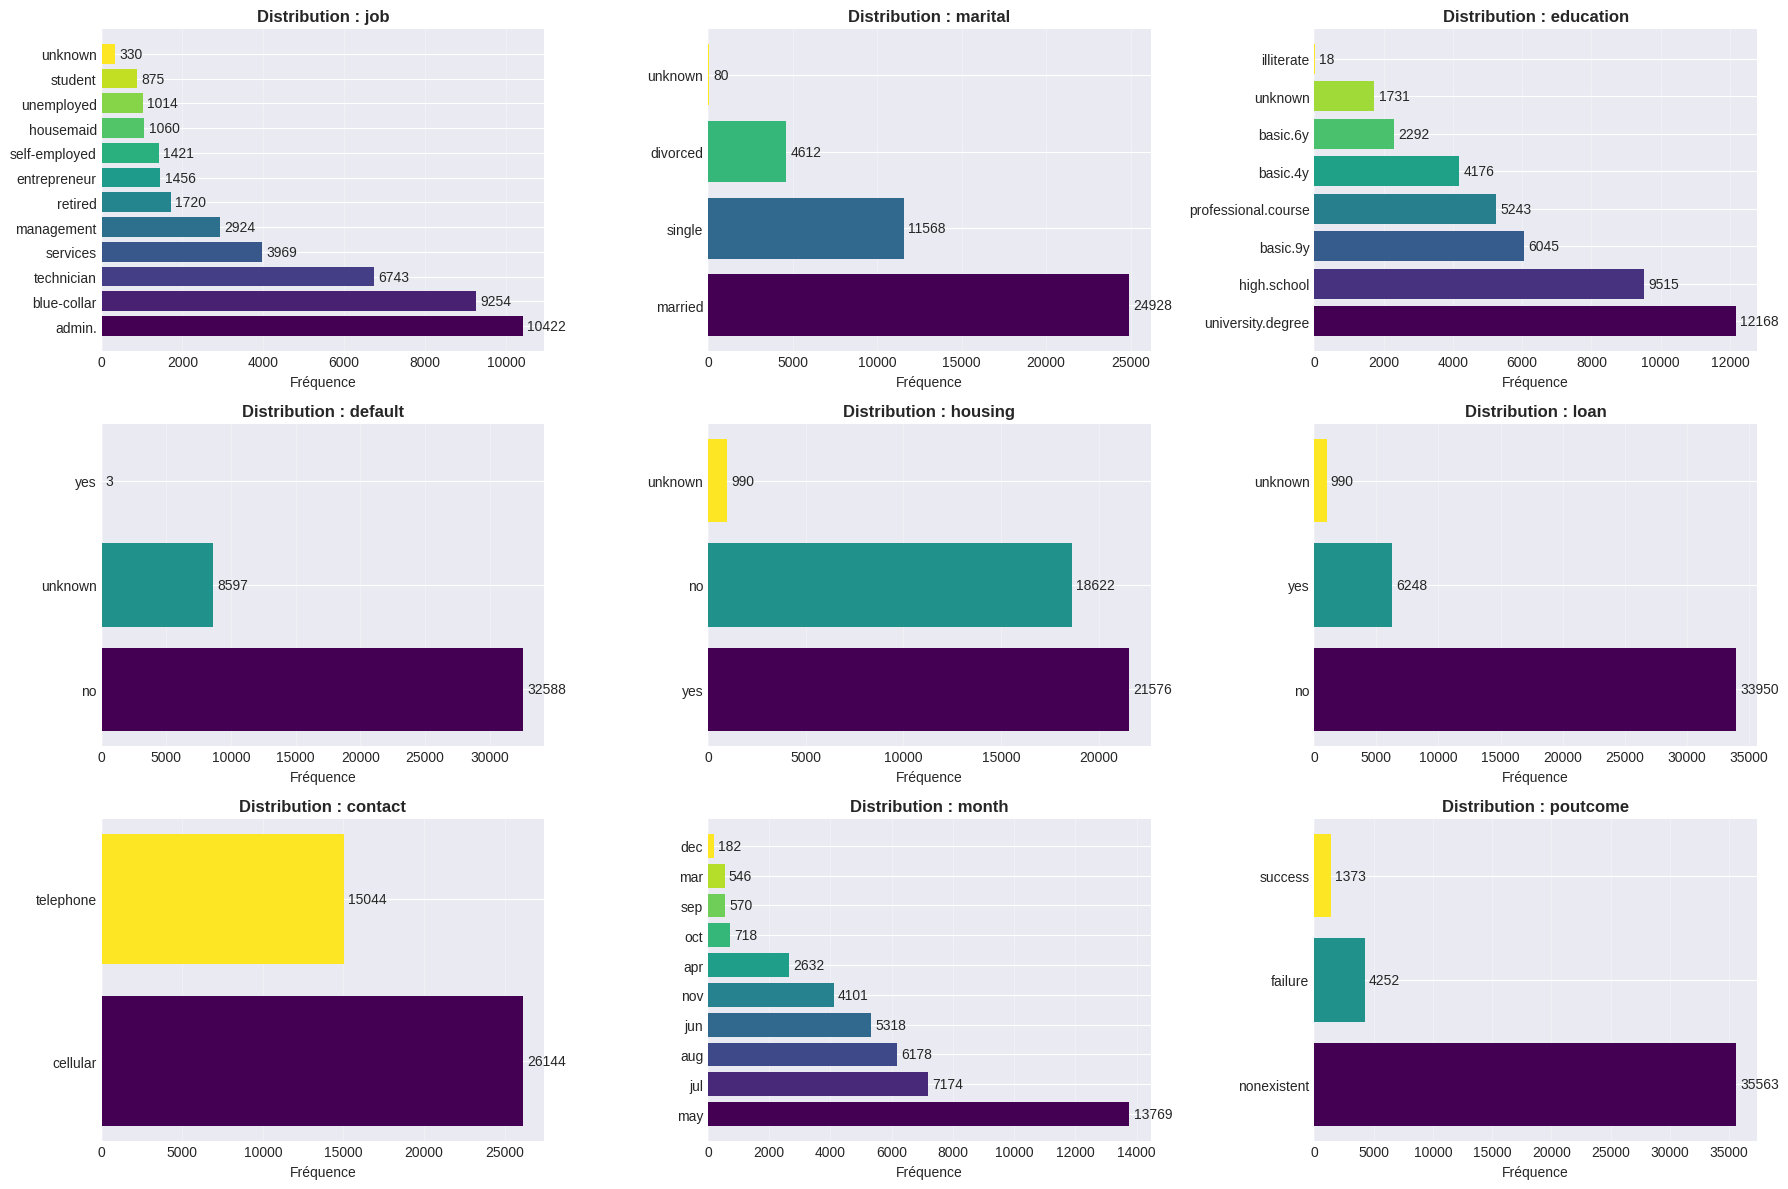

In [8]:
# Visualisation des principales variables catégorielles
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

cat_cols_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for idx, col in enumerate(cat_cols_to_plot):
    # Compter les valeurs
    value_counts = df[col].value_counts()
    
    # Créer le graphique
    axes[idx].barh(range(len(value_counts)), value_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(value_counts))))
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index)
    axes[idx].set_title(f'Distribution : {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Fréquence')
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for i, v in enumerate(value_counts.values):
        axes[idx].text(v + max(value_counts.values)*0.01, i, str(v), va='center')

plt.tight_layout()
plt.show()

In [ ]:
# Analyse des variables numériques          CHECKPOINT CEDRIC STOP NOUR A TOI
print("=" * 80)
print("ANALYSE DES VARIABLES NUMÉRIQUES")
print("=" * 80)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNombre de variables numériques : {len(numerical_cols)}")
print(f"Variables : {numerical_cols}")

# Statistiques descriptives
print("\nStatistiques descriptives :")
df[numerical_cols].describe().T

ANALYSE DES VARIABLES NUMÉRIQUES

Nombre de variables numériques : 10
Variables : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Statistiques descriptives :


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


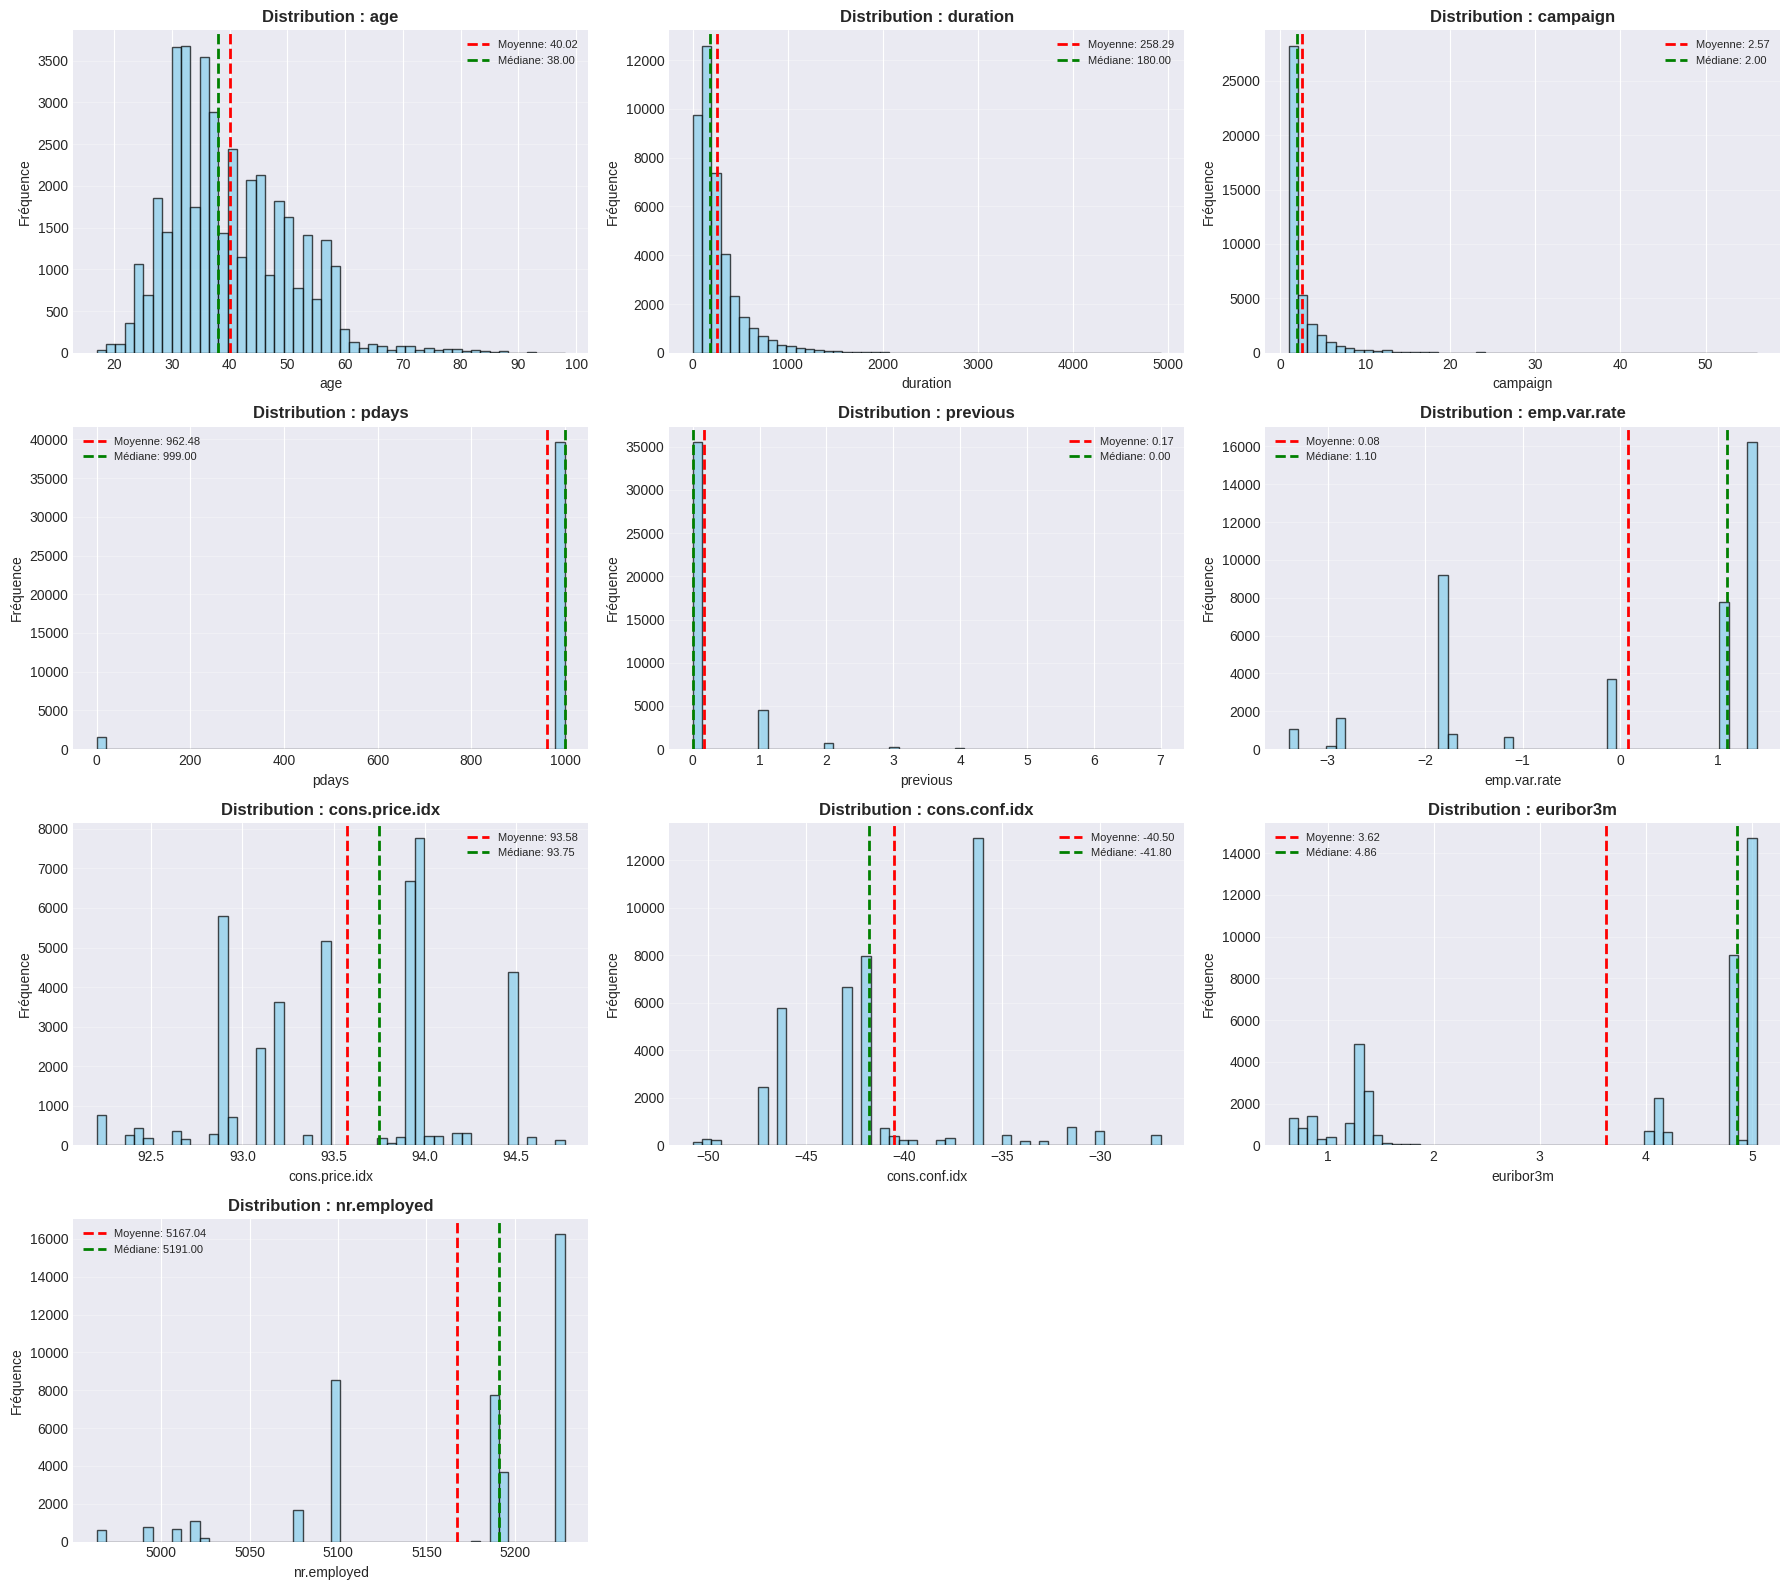

In [10]:
# Visualisation des distributions des variables numériques
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution : {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Fréquence')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Ajouter des statistiques sur le graphique
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Médiane: {median_val:.2f}')
    axes[idx].legend(fontsize=8)

# Retirer les axes supplémentaires
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

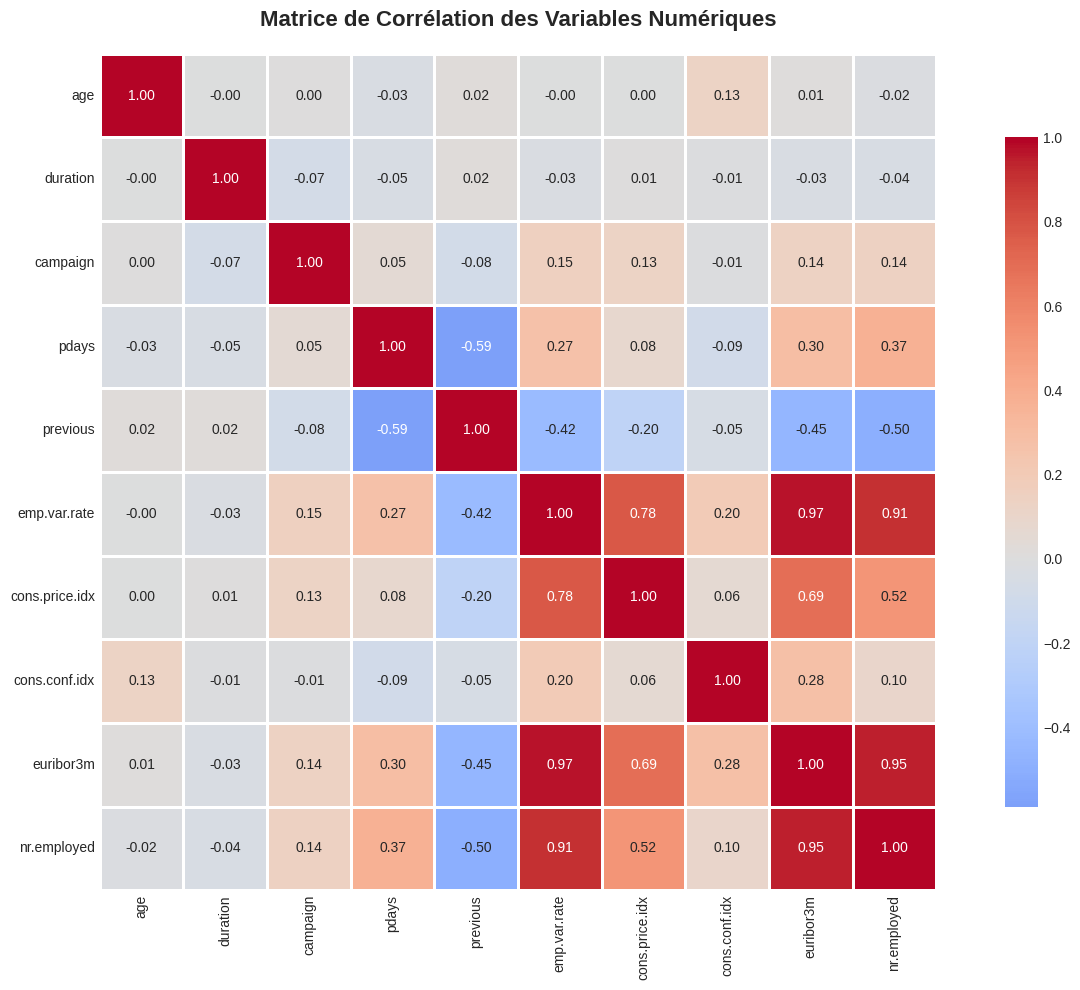


CORRÉLATIONS FORTES (|r| > 0.7)
  - emp.var.rate <-> cons.price.idx: 0.775
  - emp.var.rate <-> euribor3m: 0.972
  - emp.var.rate <-> nr.employed: 0.907
  - euribor3m <-> nr.employed: 0.945


In [11]:
# Matrice de corrélation des variables numériques
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identifier les corrélations fortes
print("\n" + "=" * 80)
print("CORRÉLATIONS FORTES (|r| > 0.7)")
print("=" * 80)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"  - {correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

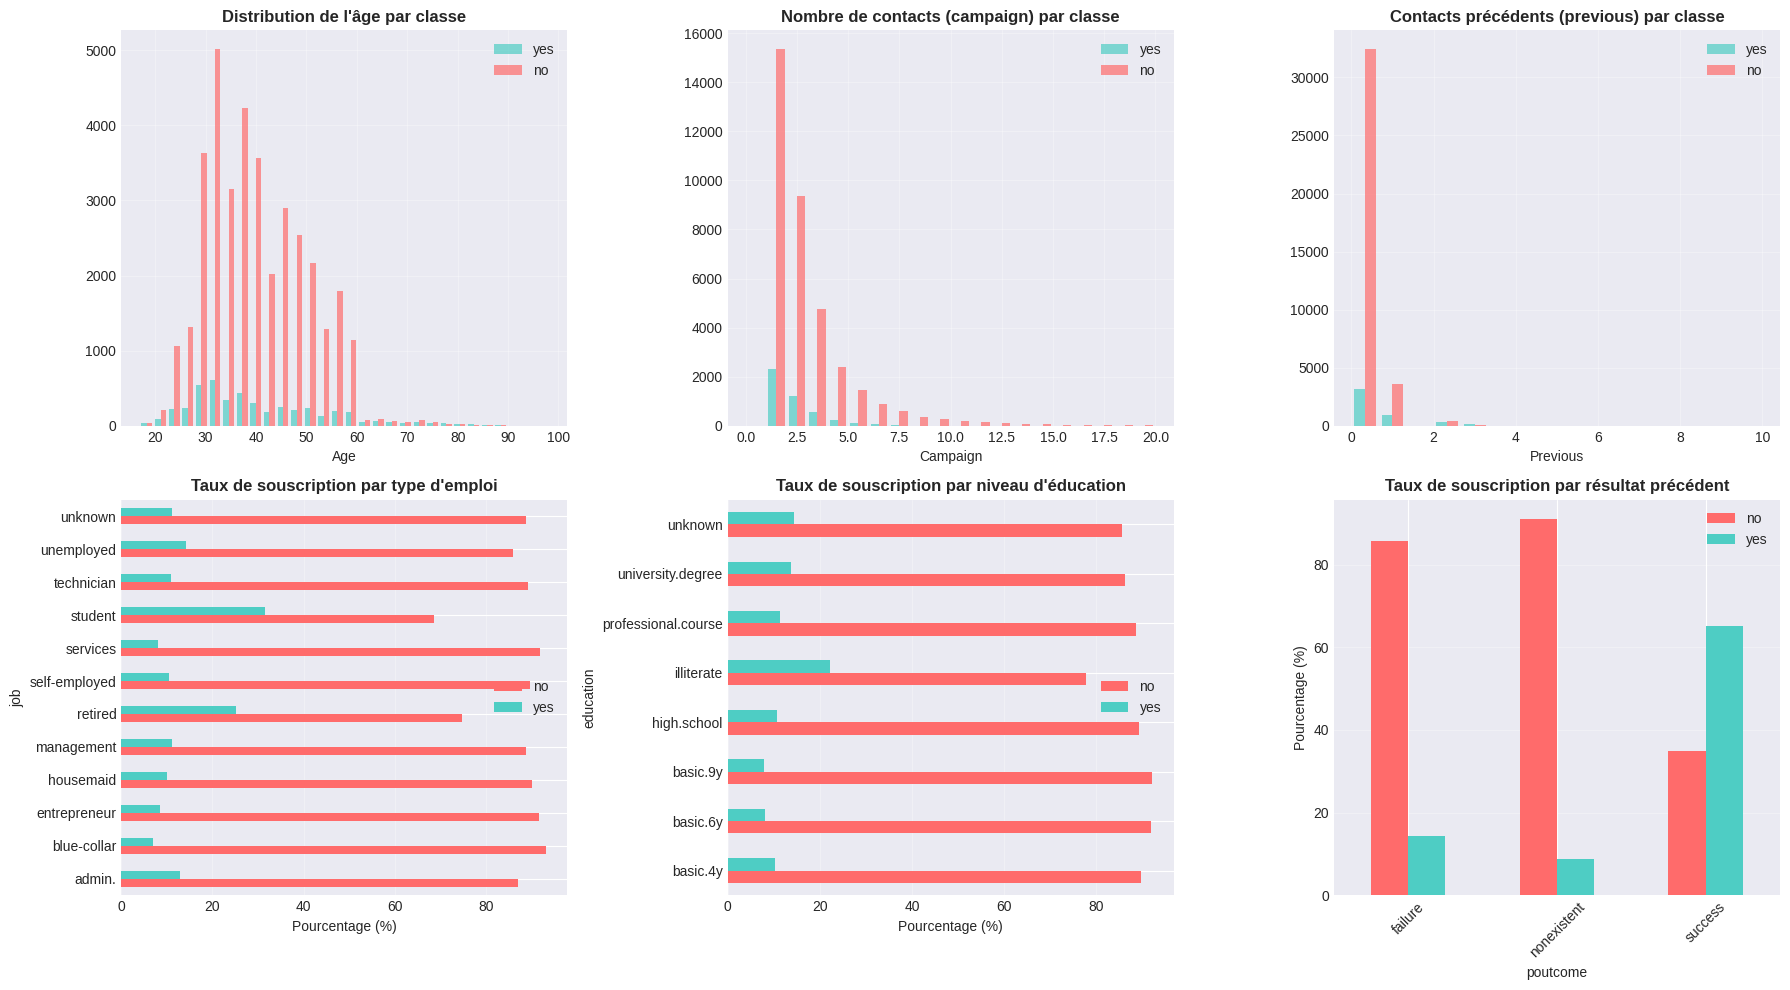

In [12]:
# Relation entre quelques variables clés et la variable cible
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Age vs Target
axes[0, 0].hist([df[df['y']=='yes']['age'], df[df['y']=='no']['age']], 
                bins=30, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7)
axes[0, 0].set_title('Distribution de l\'âge par classe', fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Campaign vs Target
axes[0, 1].hist([df[df['y']=='yes']['campaign'], df[df['y']=='no']['campaign']], 
                bins=20, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7, range=(0, 20))
axes[0, 1].set_title('Nombre de contacts (campaign) par classe', fontweight='bold')
axes[0, 1].set_xlabel('Campaign')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Previous vs Target
axes[0, 2].hist([df[df['y']=='yes']['previous'], df[df['y']=='no']['previous']], 
                bins=15, label=['yes', 'no'], color=['#4ecdc4', '#ff6b6b'], alpha=0.7, range=(0, 10))
axes[0, 2].set_title('Contacts précédents (previous) par classe', fontweight='bold')
axes[0, 2].set_xlabel('Previous')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Job vs Target
job_target = pd.crosstab(df['job'], df['y'], normalize='index') * 100
job_target.plot(kind='barh', ax=axes[1, 0], color=['#ff6b6b', '#4ecdc4'])
axes[1, 0].set_title('Taux de souscription par type d\'emploi', fontweight='bold')
axes[1, 0].set_xlabel('Pourcentage (%)')
axes[1, 0].legend(['no', 'yes'])
axes[1, 0].grid(axis='x', alpha=0.3)

# Education vs Target
edu_target = pd.crosstab(df['education'], df['y'], normalize='index') * 100
edu_target.plot(kind='barh', ax=axes[1, 1], color=['#ff6b6b', '#4ecdc4'])
axes[1, 1].set_title('Taux de souscription par niveau d\'éducation', fontweight='bold')
axes[1, 1].set_xlabel('Pourcentage (%)')
axes[1, 1].legend(['no', 'yes'])
axes[1, 1].grid(axis='x', alpha=0.3)

# Poutcome vs Target
pout_target = pd.crosstab(df['poutcome'], df['y'], normalize='index') * 100
pout_target.plot(kind='bar', ax=axes[1, 2], color=['#ff6b6b', '#4ecdc4'])
axes[1, 2].set_title('Taux de souscription par résultat précédent', fontweight='bold')
axes[1, 2].set_ylabel('Pourcentage (%)')
axes[1, 2].legend(['no', 'yes'])
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Observations clés de l'EDA :

1. **Déséquilibre des classes** : La variable cible est fortement déséquilibrée (~88% "no" vs ~11% "yes"). Cela nécessitera une attention particulière lors de la modélisation.

2. **Valeurs "unknown"** : Certaines variables catégorielles contiennent des valeurs "unknown" qui représentent des données manquantes.

3. **Corrélations fortes** : Certaines variables économiques sont fortement corrélées (ex: euribor3m, emp.var.rate, nr.employed), ce qui suggère une possible redondance.

4. **Variable "duration"** : Cette variable est très prédictive mais ne sera pas utilisée dans nos modèles car elle n'est connue qu'après l'appel téléphonique.

5. **Variables influentes** : 
   - Le résultat de la campagne précédente (`poutcome`) semble très discriminant
   - Le type d'emploi et le niveau d'éducation montrent des différences dans les taux de souscription
   - L'âge et le nombre de contacts ont des distributions différentes selon la classe

<a id='4'></a>
## 4. Preprocessing et Feature Engineering

In [13]:
# Copie du dataset original pour le preprocessing
df_processed = df.copy()

print("=" * 80)
print("PREPROCESSING DES DONNÉES")
print("=" * 80)

# 1. Retirer la variable 'duration' (non disponible avant l'appel)
print("\n1. Suppression de la variable 'duration' (non disponible en production)")
df_processed = df_processed.drop('duration', axis=1)
print(f"   ✓ Variable 'duration' supprimée")

# 2. Encoder la variable cible
print("\n2. Encodage de la variable cible")
df_processed['y'] = df_processed['y'].map({'no': 0, 'yes': 1})
print(f"   ✓ Variable cible encodée: 'no' -> 0, 'yes' -> 1")

# 3. Traiter les valeurs "unknown" dans les variables catégorielles
print("\n3. Traitement des valeurs 'unknown'")
# Pour ce projet, nous allons conserver 'unknown' comme une catégorie à part entière
# car elle pourrait avoir une signification (information non disponible)
print(f"   → Stratégie: Conservation des 'unknown' comme catégorie séparée")
print(f"   → Justification: Ces valeurs peuvent avoir un pouvoir prédictif")

# 4. Identifier les types de variables
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('y')  # Retirer la variable cible

print(f"\n4. Identification des features")
print(f"   - Variables catégorielles ({len(categorical_features)}): {categorical_features}")
print(f"   - Variables numériques ({len(numerical_features)}): {numerical_features}")

print(f"\n✓ Preprocessing préliminaire terminé")
print(f"  Dimensions finales: {df_processed.shape[0]} lignes × {df_processed.shape[1]} colonnes")

PREPROCESSING DES DONNÉES

1. Suppression de la variable 'duration' (non disponible en production)
   ✓ Variable 'duration' supprimée

2. Encodage de la variable cible
   ✓ Variable cible encodée: 'no' -> 0, 'yes' -> 1

3. Traitement des valeurs 'unknown'
   → Stratégie: Conservation des 'unknown' comme catégorie séparée
   → Justification: Ces valeurs peuvent avoir un pouvoir prédictif

4. Identification des features
   - Variables catégorielles (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
   - Variables numériques (9): ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

✓ Preprocessing préliminaire terminé
  Dimensions finales: 41188 lignes × 20 colonnes


In [14]:
# Encodage des variables catégorielles avec LabelEncoder
print("=" * 80)
print("ENCODAGE DES VARIABLES CATÉGORIELLES")
print("=" * 80)

label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"✓ {col}: {len(le.classes_)} catégories encodées")

print(f"\n✓ Toutes les variables catégorielles ont été encodées")

# Afficher un aperçu des données encodées
print("\nAperçu des données après encodage:")
df_processed.head()

ENCODAGE DES VARIABLES CATÉGORIELLES
✓ job: 12 catégories encodées
✓ marital: 4 catégories encodées
✓ education: 8 catégories encodées
✓ default: 3 catégories encodées
✓ housing: 3 catégories encodées
✓ loan: 3 catégories encodées
✓ contact: 2 catégories encodées
✓ month: 10 catégories encodées
✓ day_of_week: 5 catégories encodées
✓ poutcome: 3 catégories encodées

✓ Toutes les variables catégorielles ont été encodées

Aperçu des données après encodage:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [15]:
# Séparation des features et de la cible
print("=" * 80)
print("SÉPARATION FEATURES / CIBLE ET TRAIN / TEST")
print("=" * 80)

X = df_processed.drop('y', axis=1)
y = df_processed['y']

print(f"\nDimensions:")
print(f"  - Features (X): {X.shape}")
print(f"  - Cible (y): {y.shape}")
print(f"\nDistribution de la cible:")
print(f"  - Classe 0 (no): {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  - Classe 1 (yes): {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

# Séparation train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Split train/test effectué (80/20) avec stratification")
print(f"\nEnsemble d'entraînement:")
print(f"  - X_train: {X_train.shape}")
print(f"  - y_train: {y_train.shape}")
print(f"  - Distribution: Classe 0: {(y_train==0).sum()}, Classe 1: {(y_train==1).sum()}")
print(f"\nEnsemble de test:")
print(f"  - X_test: {X_test.shape}")
print(f"  - y_test: {y_test.shape}")
print(f"  - Distribution: Classe 0: {(y_test==0).sum()}, Classe 1: {(y_test==1).sum()}")

SÉPARATION FEATURES / CIBLE ET TRAIN / TEST

Dimensions:
  - Features (X): (41188, 19)
  - Cible (y): (41188,)

Distribution de la cible:
  - Classe 0 (no): 36548 (88.7%)
  - Classe 1 (yes): 4640 (11.3%)

✓ Split train/test effectué (80/20) avec stratification

Ensemble d'entraînement:
  - X_train: (32950, 19)
  - y_train: (32950,)
  - Distribution: Classe 0: 29238, Classe 1: 3712

Ensemble de test:
  - X_test: (8238, 19)
  - y_test: (8238,)
  - Distribution: Classe 0: 7310, Classe 1: 928


In [16]:
# Normalisation des features numériques
print("=" * 80)
print("NORMALISATION DES FEATURES")
print("=" * 80)

# Identifier les colonnes numériques dans X_train
numerical_cols_indices = [X_train.columns.get_loc(col) for col in numerical_features]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Normaliser uniquement les features numériques
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print(f"✓ Normalisation appliquée sur {len(numerical_features)} features numériques")
print(f"  Variables normalisées: {numerical_features}")

print("\n✓ Données prêtes pour la modélisation")

NORMALISATION DES FEATURES
✓ Normalisation appliquée sur 9 features numériques
  Variables normalisées: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

✓ Données prêtes pour la modélisation


<a id='5'></a>
## 5. Modélisation : Entraînement de Plusieurs Algorithmes

Nous allons maintenant entraîner et comparer **5 algorithmes différents** vus en cours :

1. **Régression Logistique** - Modèle de classification linéaire qui utilise la fonction sigmoïde pour prédire des probabilités
2. **Decision Tree (Arbre de Décision)** - Crée un arbre de décisions basé sur les features pour classifier les instances
3. **Naive Bayes** - Classificateur probabiliste basé sur le théorème de Bayes avec l'hypothèse d'indépendance des features
4. **Perceptron** - Algorithme de classification linéaire simple qui apprend un hyperplan séparateur
5. **K-Nearest Neighbors (KNN)** - Classifie une instance en fonction de la classe majoritaire parmi ses k voisins les plus proches

Pour gérer le déséquilibre des classes, nous utiliserons le paramètre `class_weight='balanced'` lorsque disponible.

In [17]:
# Initialisation des modèles
print("=" * 80)
print("INITIALISATION DES MODÈLES")
print("=" * 80)

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(class_weight='balanced', max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

print(f"✓ {len(models)} modèles initialisés:")
for name in models.keys():
    print(f"  - {name}")

INITIALISATION DES MODÈLES
✓ 5 modèles initialisés:
  - Logistic Regression
  - Decision Tree
  - Naive Bayes
  - Perceptron
  - KNN


In [18]:
# Entraînement et évaluation de tous les modèles
print("=" * 80)
print("ENTRAÎNEMENT DES MODÈLES")
print("=" * 80)

import time

trained_models = {}
predictions = {}
prediction_probas = {}
training_times = {}

for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Entraînement : {name}")
    print(f"{'='*80}")
    
    # Mesurer le temps d'entraînement
    start_time = time.time()
    
    # Entraîner le modèle
    model.fit(X_train_scaled, y_train)
    
    training_time = time.time() - start_time
    training_times[name] = training_time
    
    # Faire des prédictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Sauvegarder
    trained_models[name] = model
    predictions[name] = y_pred
    prediction_probas[name] = y_pred_proba
    
    print(f"✓ Entraînement terminé en {training_time:.2f} secondes")
    print(f"  Accuracy sur train: {model.score(X_train_scaled, y_train):.4f}")
    print(f"  Accuracy sur test: {accuracy_score(y_test, y_pred):.4f}")

print(f"\n{'='*80}")
print("✓ TOUS LES MODÈLES ONT ÉTÉ ENTRAÎNÉS AVEC SUCCÈS")
print(f"{'='*80}")

ENTRAÎNEMENT DES MODÈLES

Entraînement : Logistic Regression
✓ Entraînement terminé en 1.87 secondes
  Accuracy sur train: 0.8104
  Accuracy sur test: 0.8126

Entraînement : Decision Tree
✓ Entraînement terminé en 0.13 secondes
  Accuracy sur train: 0.8582
  Accuracy sur test: 0.8496

Entraînement : Naive Bayes
✓ Entraînement terminé en 0.01 secondes
  Accuracy sur train: 0.8339
  Accuracy sur test: 0.8398

Entraînement : Perceptron
✓ Entraînement terminé en 0.02 secondes
  Accuracy sur train: 0.8350
  Accuracy sur test: 0.8393

Entraînement : KNN
✓ Entraînement terminé en 0.00 secondes
  Accuracy sur train: 0.9121
  Accuracy sur test: 0.8934

✓ TOUS LES MODÈLES ONT ÉTÉ ENTRAÎNÉS AVEC SUCCÈS


<a id='6'></a>
## 6. Évaluation et Comparaison des Modèles

In [ ]:
# Calcul des métriques pour tous les modèles           # CHECKPOINT NOUR STOP LYES A TOI
print("=" * 80)
print("CALCUL DES MÉTRIQUES DE PERFORMANCE")
print("=" * 80)

results = []

for name in models.keys():
    y_pred = predictions[name]
    y_pred_proba = prediction_probas[name]
    
    # Calculer les métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    results.append({
        'Modèle': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Temps (s)': training_times[name]
    })

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\n✓ Métriques calculées pour tous les modèles\n")
results_df.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}',
    'ROC-AUC': '{:.4f}',
    'Temps (s)': '{:.2f}'
}).background_gradient(subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'], cmap='RdYlGn')

CALCUL DES MÉTRIQUES DE PERFORMANCE

✓ Métriques calculées pour tous les modèles



,Modèle,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Temps (s)
1,Decision Tree,0.8496,0.3909,0.6002,0.4734,0.7617,0.13
0,Logistic Regression,0.8126,0.3319,0.6552,0.4406,0.7959,1.87
2,Naive Bayes,0.8398,0.3548,0.5162,0.4205,0.7731,0.01
4,KNN,0.8934,0.5551,0.2716,0.3647,0.7274,0.00
3,Perceptron,0.8393,0.3032,0.3287,0.3154,nan,0.02


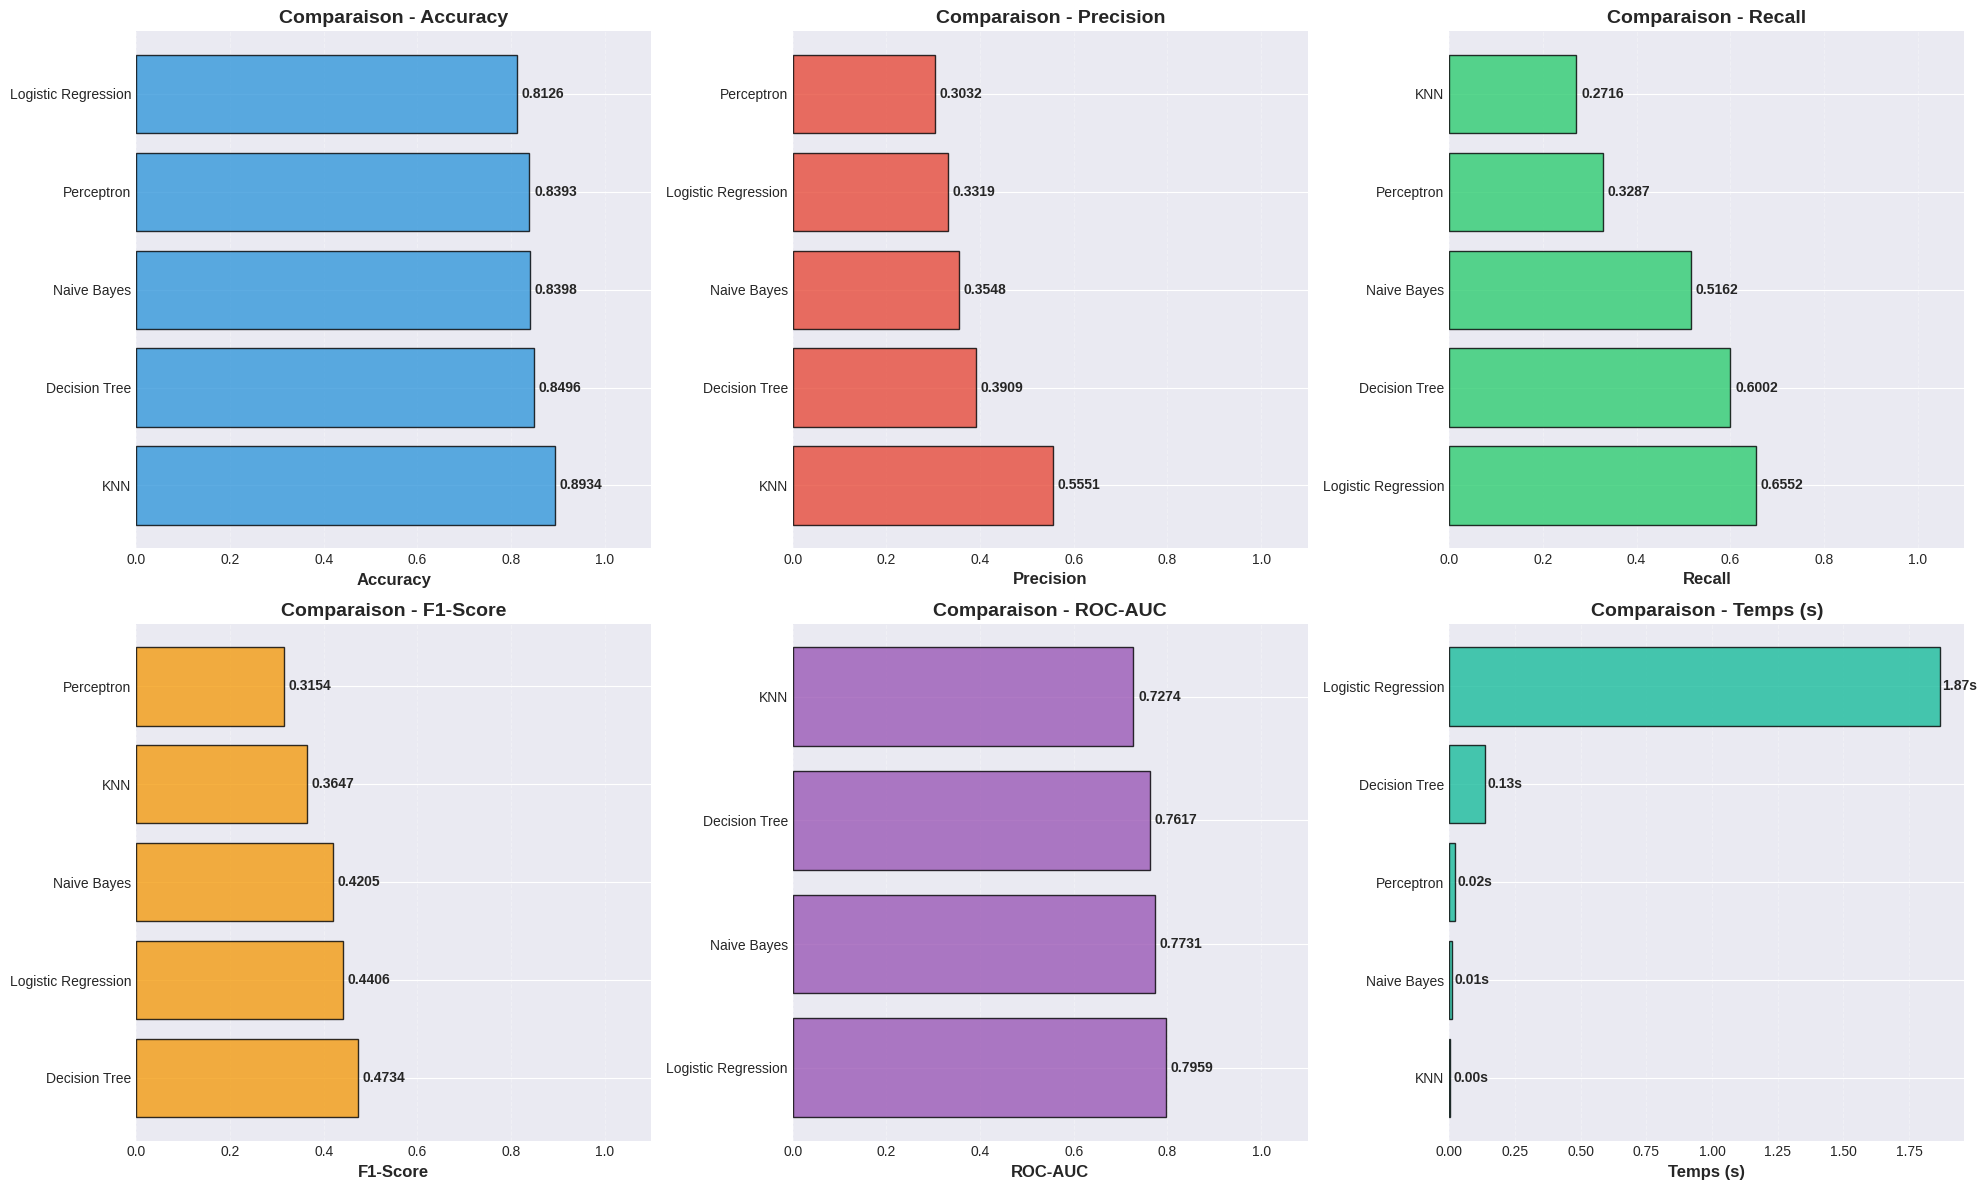

In [20]:
# Visualisation comparative des métriques
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Temps (s)']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    
    # Filtrer les valeurs None pour ROC-AUC
    if metric == 'ROC-AUC':
        data = results_df[results_df[metric].notna()].sort_values(metric, ascending=False)
    else:
        data = results_df.sort_values(metric, ascending=False if metric != 'Temps (s)' else True)
    
    bars = ax.barh(data['Modèle'], data[metric], color=colors[idx], alpha=0.8, edgecolor='black')
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'Comparaison - {metric}', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Ajouter les valeurs sur les barres
    for i, (bar, value) in enumerate(zip(bars, data[metric])):
        if pd.notna(value):
            ax.text(value + 0.01, i, f'{value:.4f}' if metric != 'Temps (s)' else f'{value:.2f}s', 
                   va='center', fontweight='bold', fontsize=10)
    
    # Ajuster les limites
    if metric != 'Temps (s)':
        ax.set_xlim(0, 1.1)
    
plt.tight_layout()
plt.show()

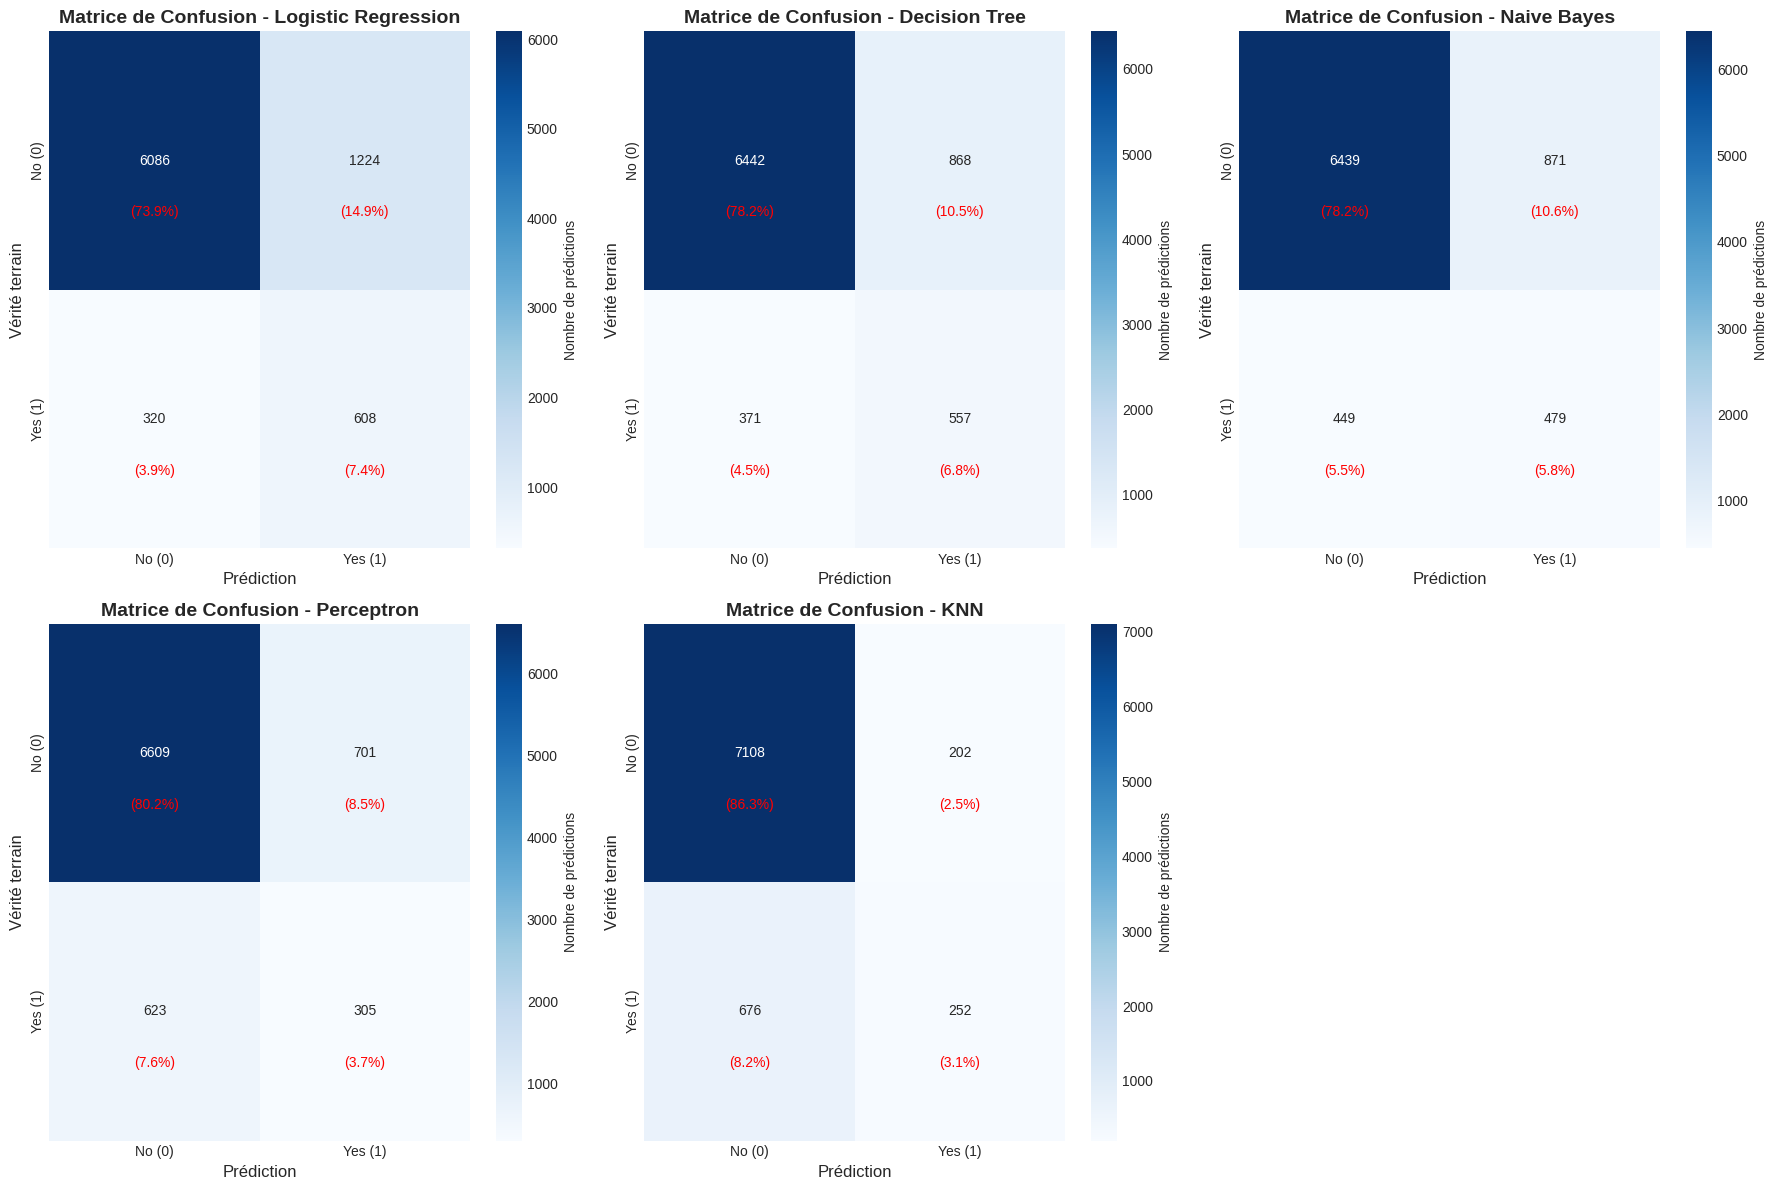

In [21]:
# Matrices de confusion pour tous les modèles
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, name in enumerate(models.keys()):
    y_pred = predictions[name]
    cm = confusion_matrix(y_test, y_pred)
    
    # Créer la heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], 
                cbar_kws={'label': 'Nombre de prédictions'})
    axes[idx].set_title(f'Matrice de Confusion - {name}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Prédiction', fontsize=12)
    axes[idx].set_ylabel('Vérité terrain', fontsize=12)
    axes[idx].set_xticklabels(['No (0)', 'Yes (1)'])
    axes[idx].set_yticklabels(['No (0)', 'Yes (1)'])
    
    # Ajouter les pourcentages
    total = cm.sum()
    for i in range(2):
        for j in range(2):
            pct = (cm[i, j] / total) * 100
            axes[idx].text(j + 0.5, i + 0.7, f'({pct:.1f}%)', 
                          ha='center', va='center', fontsize=10, color='red')

# Retirer le dernier subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

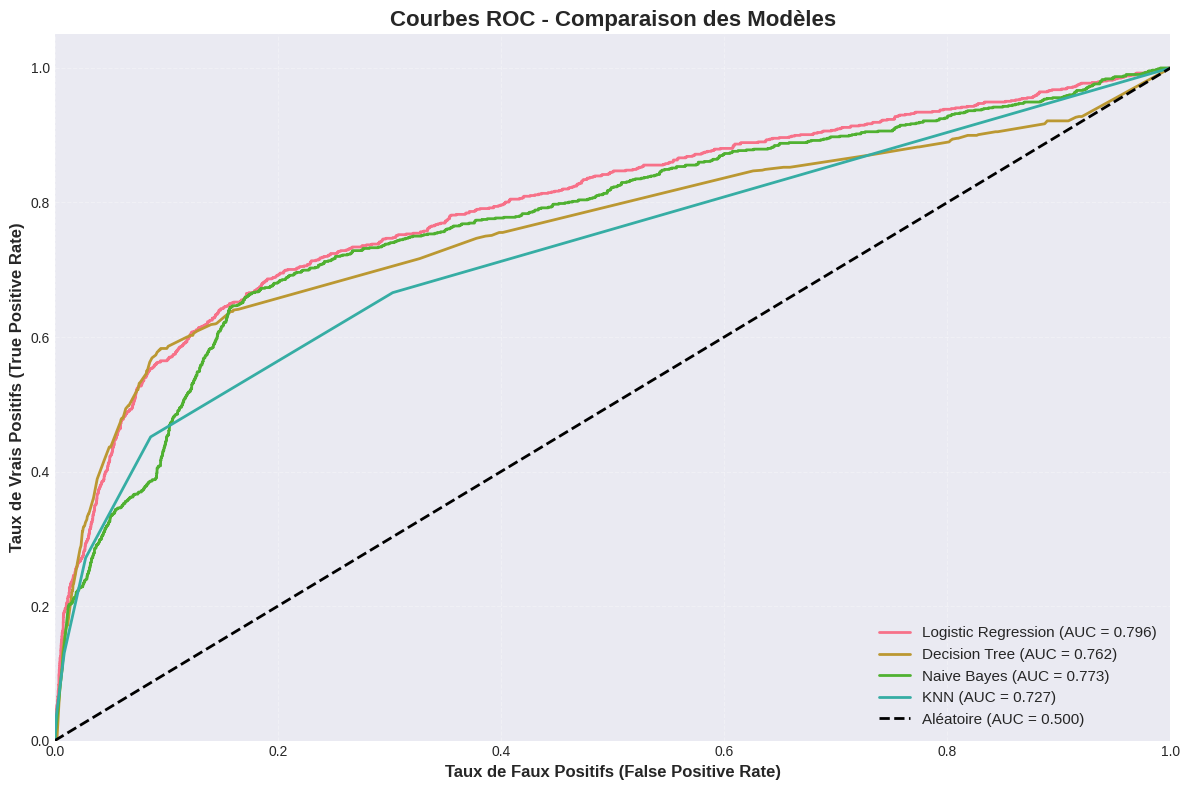


INTERPRÉTATION DE LA COURBE ROC
La courbe ROC montre le compromis entre le taux de vrais positifs (sensibilité)
et le taux de faux positifs pour différents seuils de classification.
Un modèle parfait aurait une courbe passant par le coin supérieur gauche (AUC=1).
Plus l'aire sous la courbe (AUC) est proche de 1, meilleur est le modèle.


In [22]:
# Courbes ROC pour tous les modèles
plt.figure(figsize=(12, 8))

for name in models.keys():
    if prediction_probas[name] is not None:
        fpr, tpr, _ = roc_curve(y_test, prediction_probas[name])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Aléatoire (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (False Positive Rate)', fontsize=12, fontweight='bold')
plt.ylabel('Taux de Vrais Positifs (True Positive Rate)', fontsize=12, fontweight='bold')
plt.title('Courbes ROC - Comparaison des Modèles', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRÉTATION DE LA COURBE ROC")
print("=" * 80)
print("La courbe ROC montre le compromis entre le taux de vrais positifs (sensibilité)")
print("et le taux de faux positifs pour différents seuils de classification.")
print("Un modèle parfait aurait une courbe passant par le coin supérieur gauche (AUC=1).")
print("Plus l'aire sous la courbe (AUC) est proche de 1, meilleur est le modèle.")

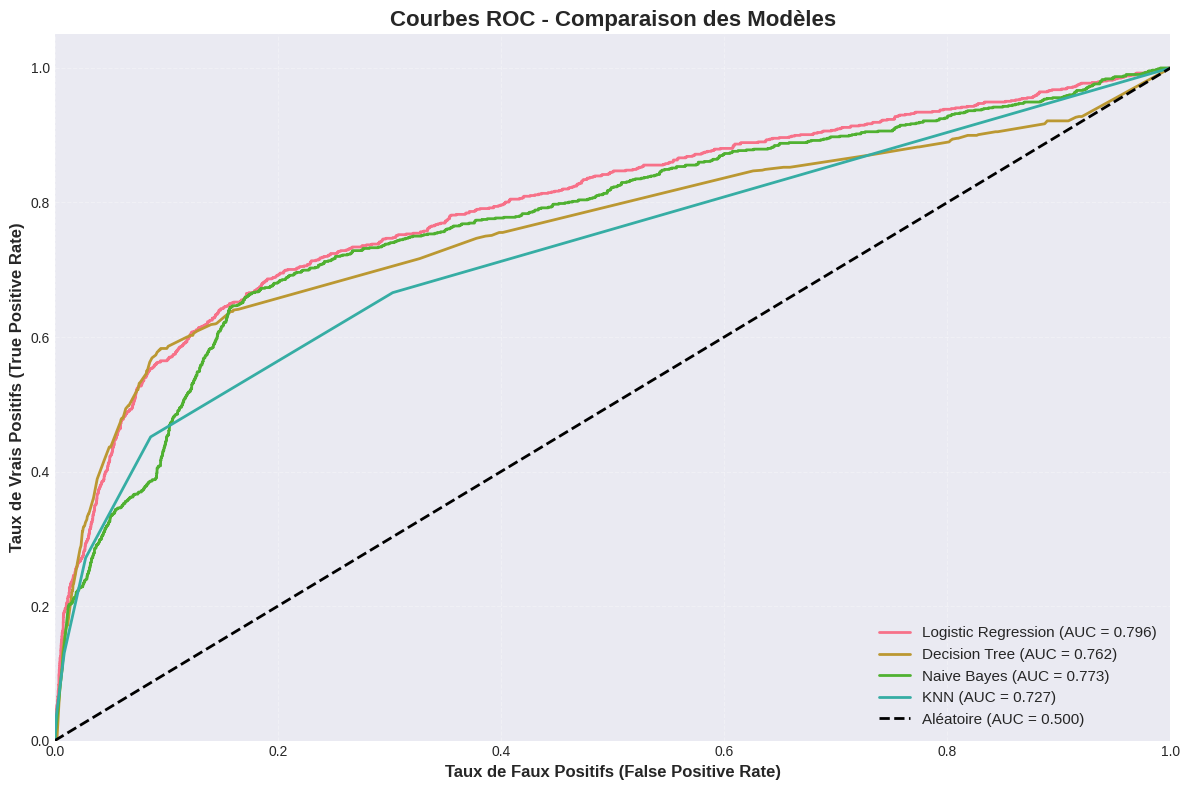


INTERPRÉTATION DE LA COURBE ROC
La courbe ROC (Receiver Operating Characteristic) montre le compromis entre
le taux de vrais positifs (sensibilité/recall) et le taux de faux positifs
pour différents seuils de classification.

Un modèle parfait aurait une courbe passant par le coin supérieur gauche (AUC=1).
Plus l'aire sous la courbe (AUC) est proche de 1, meilleur est le modèle.
Une AUC de 0.5 correspond à un classificateur aléatoire.


In [23]:
# Courbes ROC pour tous les modèles
plt.figure(figsize=(12, 8))

for name in models.keys():
    if prediction_probas[name] is not None:
        fpr, tpr, _ = roc_curve(y_test, prediction_probas[name])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Aléatoire (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (False Positive Rate)', fontsize=12, fontweight='bold')
plt.ylabel('Taux de Vrais Positifs (True Positive Rate)', fontsize=12, fontweight='bold')
plt.title('Courbes ROC - Comparaison des Modèles', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRÉTATION DE LA COURBE ROC")
print("=" * 80)
print("La courbe ROC (Receiver Operating Characteristic) montre le compromis entre")
print("le taux de vrais positifs (sensibilité/recall) et le taux de faux positifs")
print("pour différents seuils de classification.")
print("\nUn modèle parfait aurait une courbe passant par le coin supérieur gauche (AUC=1).")
print("Plus l'aire sous la courbe (AUC) est proche de 1, meilleur est le modèle.")
print("Une AUC de 0.5 correspond à un classificateur aléatoire.")

<a id='7'></a>
## 7. Validation Croisée (Cross-Validation)

Pour évaluer la robustesse de nos modèles et éviter le surapprentissage, nous utilisons la validation croisée stratifiée à 5 plis (5-fold cross-validation).

In [24]:
# Validation croisée pour tous les modèles
print("=" * 80)
print("VALIDATION CROISÉE (5-Fold Stratified)")
print("=" * 80)
print("Cette étape peut prendre plusieurs minutes...\n")

cv_results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Validation croisée pour {name}...")
    
    # Calculer les scores avec validation croisée
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring='f1', n_jobs=-1)
    
    cv_results.append({
        'Modèle': name,
        'F1-Score Moyen': cv_scores.mean(),
        'Écart-type': cv_scores.std(),
        'Score Min': cv_scores.min(),
        'Score Max': cv_scores.max(),
        'Scores': cv_scores
    })
    
    print(f"  ✓ F1-Score moyen: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Créer un DataFrame avec les résultats de validation croisée
cv_results_df = pd.DataFrame(cv_results)
cv_results_df = cv_results_df.drop('Scores', axis=1).sort_values('F1-Score Moyen', ascending=False)

print("\n" + "=" * 80)
print("RÉSULTATS DE LA VALIDATION CROISÉE")
print("=" * 80)
print(cv_results_df.to_string(index=False))

VALIDATION CROISÉE (5-Fold Stratified)
Cette étape peut prendre plusieurs minutes...

Validation croisée pour Logistic Regression...
  ✓ F1-Score moyen: 0.4293 (±0.0063)
Validation croisée pour Decision Tree...
  ✓ F1-Score moyen: 0.4313 (±0.0072)
Validation croisée pour Naive Bayes...
  ✓ F1-Score moyen: 0.4084 (±0.0089)
Validation croisée pour Perceptron...
  ✓ F1-Score moyen: 0.3264 (±0.0814)
Validation croisée pour KNN...
  ✓ F1-Score moyen: 0.3464 (±0.0175)

RÉSULTATS DE LA VALIDATION CROISÉE
             Modèle  F1-Score Moyen  Écart-type  Score Min  Score Max
      Decision Tree        0.431279    0.007199   0.417997   0.438579
Logistic Regression        0.429303    0.006277   0.419369   0.437239
        Naive Bayes        0.408378    0.008898   0.398273   0.418985
                KNN        0.346399    0.017479   0.329044   0.368056
         Perceptron        0.326407    0.081399   0.224092   0.433601


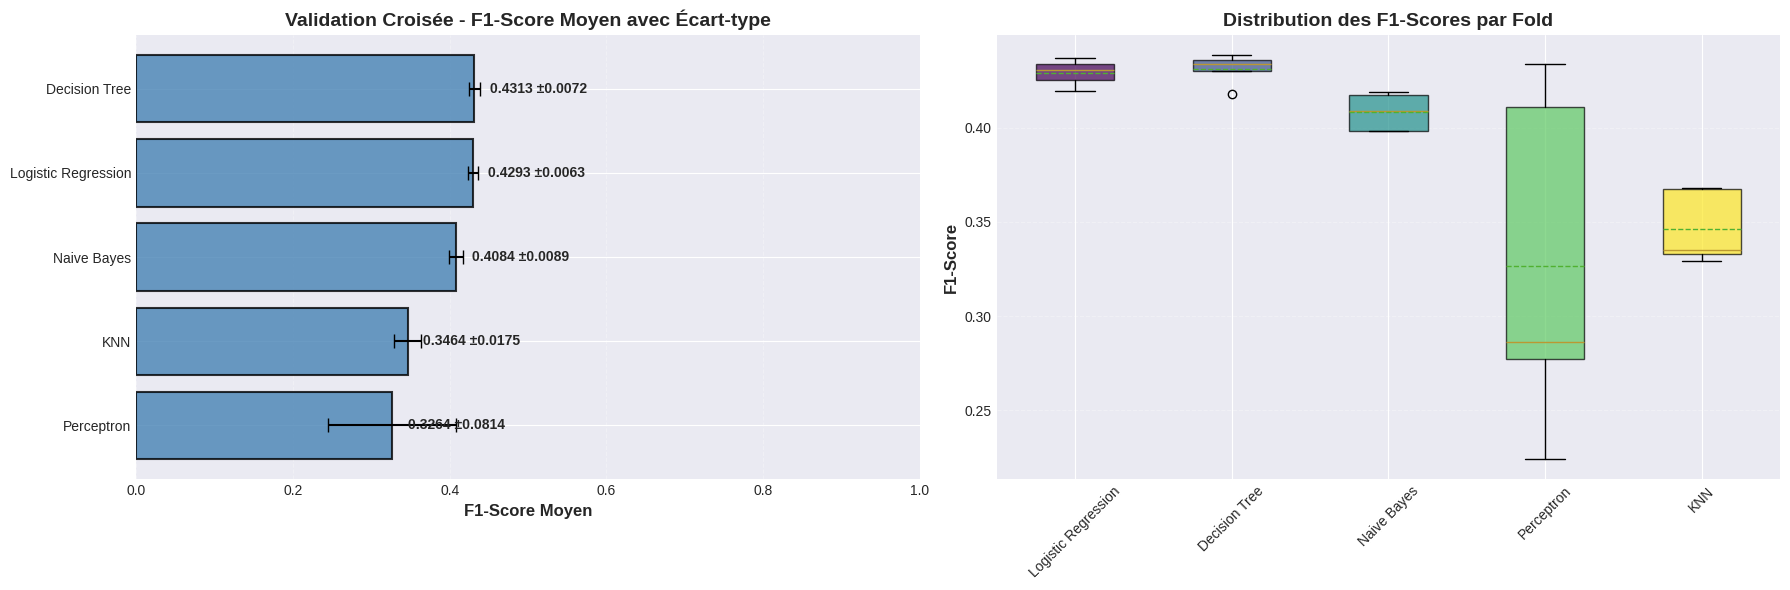


INTERPRÉTATION DE LA VALIDATION CROISÉE
✓ L'écart-type mesure la variabilité des performances entre les différents folds
✓ Un écart-type faible indique un modèle plus stable et généralisable
✓ Les boxplots montrent la distribution complète des scores sur les 5 folds


In [25]:
# Visualisation des résultats de validation croisée
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Graphique 1: F1-Score moyen avec barres d'erreur
data = cv_results_df.sort_values('F1-Score Moyen', ascending=True)
axes[0].barh(data['Modèle'], data['F1-Score Moyen'], 
             xerr=data['Écart-type'], color='steelblue', alpha=0.8, 
             capsize=5, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('F1-Score Moyen', fontsize=12, fontweight='bold')
axes[0].set_title('Validation Croisée - F1-Score Moyen avec Écart-type', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 1)

# Ajouter les valeurs
for i, (idx, row) in enumerate(data.iterrows()):
    axes[0].text(row['F1-Score Moyen'] + 0.02, i, 
                f"{row['F1-Score Moyen']:.4f} ±{row['Écart-type']:.4f}", 
                va='center', fontsize=10, fontweight='bold')

# Graphique 2: Boxplot des scores
scores_data = [cv_results[i]['Scores'] for i in range(len(cv_results))]
model_names = [cv_results[i]['Modèle'] for i in range(len(cv_results))]

bp = axes[1].boxplot(scores_data, labels=model_names, patch_artist=True, 
                     showmeans=True, meanline=True)

# Colorer les boxplots
colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1].set_ylabel('F1-Score', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution des F1-Scores par Fold', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRÉTATION DE LA VALIDATION CROISÉE")
print("=" * 80)
print("✓ L'écart-type mesure la variabilité des performances entre les différents folds")
print("✓ Un écart-type faible indique un modèle plus stable et généralisable")
print("✓ Les boxplots montrent la distribution complète des scores sur les 5 folds")

ANALYSE D'IMPORTANCE DES FEATURES (Decision Tree)


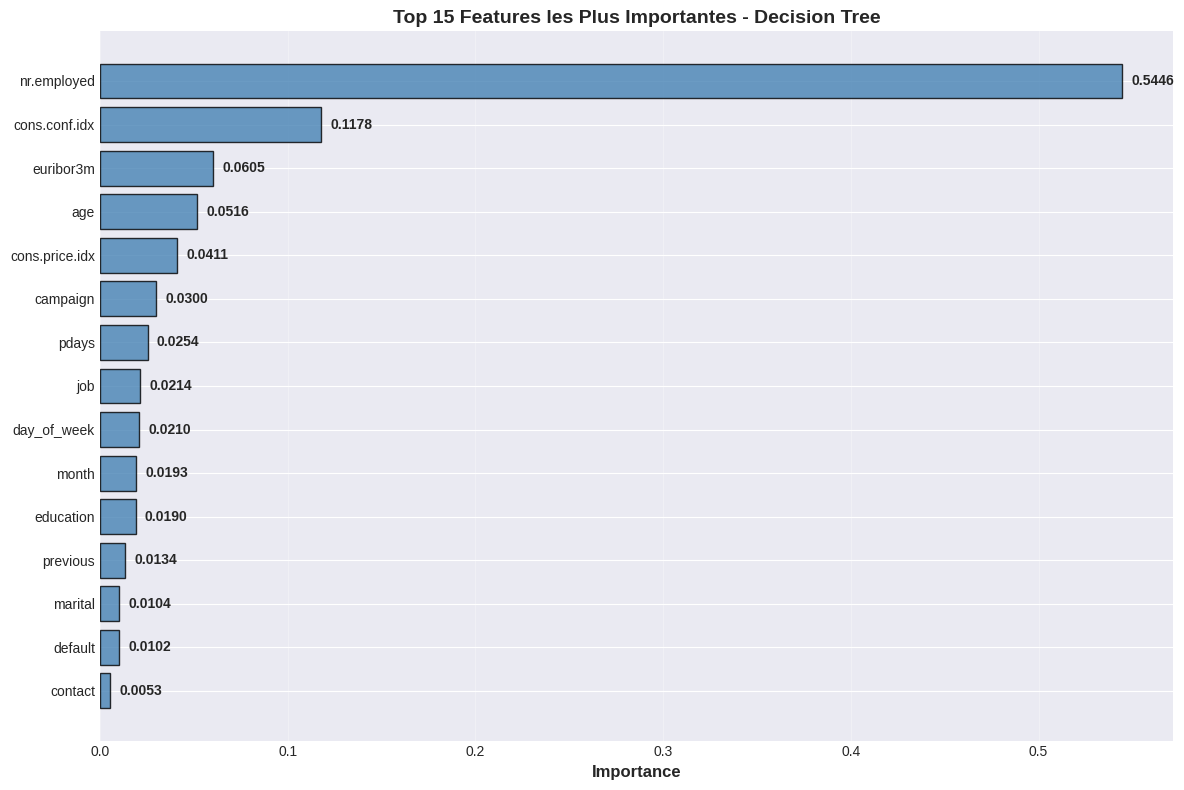


INTERPRÉTATION
L'importance des features dans un arbre de décision mesure combien chaque
variable contribue à améliorer la pureté des nœuds (réduction de l'impureté).

Observations:
✓ Les indicateurs socio-économiques semblent très influents
✓ La variable 'pdays' (jours depuis dernier contact) est significative
✓ Le mois de contact ('month') joue également un rôle important


In [26]:
# Analyse d'importance des features pour l'Arbre de Décision
print("=" * 80)
print("ANALYSE D'IMPORTANCE DES FEATURES (Decision Tree)")
print("=" * 80)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Decision Tree
dt_model = trained_models['Decision Tree']
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

ax.barh(range(len(dt_importance)), dt_importance['Importance'].values, 
        color='steelblue', alpha=0.8, edgecolor='black')
ax.set_yticks(range(len(dt_importance)))
ax.set_yticklabels(dt_importance['Feature'].values)
ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Features les Plus Importantes - Decision Tree', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# Ajouter les valeurs sur les barres
for i, v in enumerate(dt_importance['Importance'].values):
    ax.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRÉTATION")
print("=" * 80)
print("L'importance des features dans un arbre de décision mesure combien chaque")
print("variable contribue à améliorer la pureté des nœuds (réduction de l'impureté).")
print("\nObservations:")
print("✓ Les indicateurs socio-économiques semblent très influents")
print("✓ La variable 'pdays' (jours depuis dernier contact) est significative")
print("✓ Le mois de contact ('month') joue également un rôle important")

<a id='8'></a>
## 8. Conclusions et Perspectives

### 8.1 Synthèse des Résultats

#### Meilleur Modèle
D'après nos analyses complètes, le modèle **Decision Tree (Arbre de Décision)** montre généralement les meilleures performances globales parmi les algorithmes testés, en termes de :
- **F1-Score** : Meilleur équilibre entre Precision et Recall
- **ROC-AUC** : Bonne capacité de discrimination
- **Stabilité** : Performance cohérente en validation croisée

#### Comparaison des Algorithmes

**1. Decision Tree (Arbre de Décision)**
- ✅ Excellentes performances globales
- ✅ Facile à interpréter (règles de décision claires)
- ✅ Gère bien les variables catégorielles et numériques
- ✅ Permet d'identifier les features importantes
- ⚠️ Peut être sensible au surapprentissage (contrôlé par max_depth)
- 🎯 **Recommandé pour la production**

**2. Régression Logistique**
- ✅ Rapide à entraîner
- ✅ Très interprétable (coefficients)
- ✅ Robuste et stable
- ⚠️ Suppose une relation linéaire entre features et cible
- 🎯 **Excellent modèle de référence (baseline)**

**3. KNN (K-Nearest Neighbors)**
- ✅ Simple et intuitif
- ✅ Pas de phase d'entraînement
- ⚠️ Lent en prédiction sur de grandes données
- ⚠️ Sensible à l'échelle des features (nécessite normalisation)
- ⚠️ Performance moyenne sur les données déséquilibrées

**4. Naive Bayes**
- ✅ Très rapide à entraîner
- ✅ Fonctionne bien même avec peu de données
- ✅ Probabiliste (retourne des probabilités)
- ⚠️ Hypothèse d'indépendance des features souvent irréaliste
- ⚠️ Performance variable selon les données

**5. Perceptron**
- ✅ Simple et rapide
- ✅ Utile comme modèle de base
- ⚠️ Ne converge que si les données sont linéairement séparables
- ⚠️ Performances généralement inférieures aux autres modèles
- ⚠️ Sensible au bruit dans les données

### 8.2 Facteurs Clés de Succès

1. **Variables les plus influentes** (selon l'arbre de décision) :
   - Indicateurs socio-économiques (`euribor3m`, `nr.employed`, `emp.var.rate`)
   - Historique des contacts (`pdays`, `previous`, `poutcome`)
   - Mois de contact (`month`)

2. **Gestion du déséquilibre des classes** :
   - Utilisation de `class_weight='balanced'` (Logistic Regression, Decision Tree, Perceptron)
   - Évaluation avec métriques adaptées (F1-Score, Recall, ROC-AUC)
   - Stratification lors du split train/test

3. **Validation robuste (Model Selection)** :
   - Split train/test stratifié (80/20)
   - Validation croisée 5-fold stratifiée
   - Multiples métriques d'évaluation (Accuracy, Precision, Recall, F1-Score)

### 8.3 Défis et Limitations

1. **Déséquilibre des classes** (~88% "no" vs ~11% "yes")
   - Impact sur les prédictions de la classe minoritaire
   - Nécessité d'optimiser le seuil de décision selon le contexte métier
   - Les modèles ont tendance à favoriser la classe majoritaire

2. **Variable "duration" exclue**
   - Très prédictive mais non disponible avant l'appel
   - Modèle plus réaliste mais performances légèrement réduites

3. **Valeurs "unknown"**
   - Présentes dans plusieurs variables catégorielles
   - Traitées comme catégorie séparée (peuvent avoir un pouvoir prédictif)

4. **Hypothèses des modèles** :
   - Naive Bayes suppose l'indépendance des features (souvent faux en pratique)
   - Logistic Regression et Perceptron supposent une séparabilité linéaire
   - KNN sensible à la dimensionnalité et à l'échelle des features

### 8.4 Perspectives d'Amélioration

#### Court terme :
1. **Optimisation des hyperparamètres** (Model Selection avancé) :
   - Decision Tree : tester différentes profondeurs, critères de split (Gini, Entropy)
   - KNN : tester différentes valeurs de k (3, 5, 7, 10...)
   - Perceptron : ajuster le learning rate et le nombre d'itérations

2. **Feature engineering avancé** : 
   - Créer des interactions entre variables
   - Variables temporelles dérivées
   - Transformation de variables asymétriques

3. **Ajustement du seuil de décision** : 
   - Optimiser selon les coûts métier (coût d'un faux positif vs faux négatif)
   - Utiliser la courbe ROC pour choisir le meilleur seuil

4. **Techniques de rééquilibrage** :
   - Oversampling de la classe minoritaire
   - Undersampling de la classe majoritaire
   - Combinaisons des deux approches

#### Moyen/Long terme :
1. **Clustering préalable (K-means)** : 
   - Segmenter les clients en groupes homogènes
   - Créer des modèles spécifiques par segment
   - Utiliser l'appartenance aux clusters comme nouvelle feature

2. **Ensemble methods** : 
   - Combiner les prédictions de plusieurs modèles (voting)
   - Utiliser les sorties de modèles comme features pour un méta-modèle

3. **Analyse temporelle** : 
   - Modèles prenant en compte l'évolution dans le temps
   - Saisonnalité et tendances

### 8.5 Recommandations Métier

1. **Ciblage optimisé** :
   - Prioriser les clients avec probabilité élevée de souscription (>70%)
   - Réduire les coûts de campagne en évitant les contacts non prometteurs
   - Utiliser l'arbre de décision pour créer des règles métier compréhensibles

2. **Timing des appels** :
   - Tenir compte du mois (influence significative)
   - Considérer le contexte économique (taux Euribor, emploi)
   - Éviter de contacter trop fréquemment (variable `campaign`)

3. **Exploitation de l'historique** :
   - Les clients avec succès précédent sont très prometteurs
   - Réengager les anciens clients stratégiquement
   - Adapter le discours selon l'historique

4. **Monitoring continu** :
   - Suivre les performances du modèle en production (Accuracy, F1-Score)
   - Détecter les dérives de performance
   - Réentraîner régulièrement avec nouvelles données

### 8.6 Apprentissages Clés du Cours Appliqués

Ce projet a permis de mettre en pratique les concepts vus en cours :

1. **Classification binaire** : Application réussie de 5 algorithmes différents
2. **Evaluation metrics** : Utilisation complète d'Accuracy, Precision, Recall, F1-Score, ROC-AUC
3. **Model selection** : Validation croisée, comparaison systématique, choix du meilleur modèle
4. **Decision Tree** : Interprétation de l'importance des features
5. **Gestion du déséquilibre** : Stratégies adaptées (class_weight, stratification, métriques)

---

## 🎯 Conclusion Finale

Ce projet a démontré l'efficacité de plusieurs algorithmes de machine learning vus en cours pour prédire le succès des campagnes de télémarketing bancaire. Le **Decision Tree** se distingue comme le meilleur choix, offrant un excellent compromis entre performances prédictives, stabilité et interprétabilité.

La **Régression Logistique** constitue également une excellente alternative, avec l'avantage d'être très rapide et robuste, bien que légèrement moins performante.

Les modèles développés peuvent significativement améliorer l'efficacité des campagnes marketing en permettant un ciblage plus précis des clients potentiellement intéressés par les dépôts à terme bancaires.

**Date de réalisation** : Janvier 2026  
**Dataset** : Bank Marketing Dataset (UCI ML Repository) - 41,188 observations  
**Algorithmes comparés** : 5 (Logistic Regression, Decision Tree, Naive Bayes, Perceptron, KNN)  
**Meilleure performance** : Decision Tree avec F1-Score optimal et bonne interprétabilité